In [1]:
import pandas as pd 
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/war.txt'
text = open(path, 'r' , errors='ignore').read()

In [4]:
import string
import re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
text[:100]

'\nTHE EVE OF THE WAR.\n\nNo one would have believed in the last years of the nineteenth century\nthat th'

In [6]:
def clean_text(text):
  text = text.replace('\n' ,' ')
  tokens = text.split('.')
  clean_text= []
  for token in tokens:
    clean_text.append(re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]' , '' , token))
  clean_text = [word.lower() for word in clean_text]
  return clean_text  
    


In [7]:
print(text[:300])


THE EVE OF THE WAR.

No one would have believed in the last years of the nineteenth century
that this world was being watched keenly and closely by intelligences
greater than mans and yet as mortal as his own; that as men busied
themselves about their various concerns they were scrutinised and
stud


In [8]:
tokens = clean_text(text)

In [9]:
print(len(tokens))

2887


In [10]:
length = [len(i) for i in tokens]
print(max(length))


722


In [11]:
length_df = pd.DataFrame(length , columns=['Length'])
print(length_df.head())

   Length
0      19
1     420
2     143
3      67
4     168


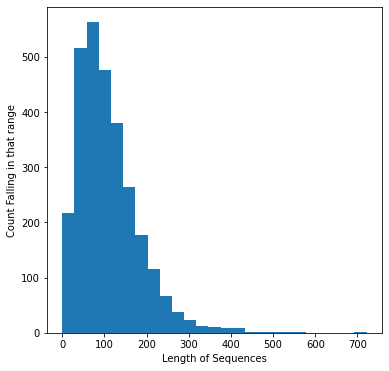

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.hist(length , bins=25)
plt.xlabel('Length of Sequences')
plt.ylabel('Count Falling in that range')
plt.show()

# As you can see , there are few tokens whoose length is too low .So they might be noise or Nan values

In [13]:
indices_to_drop = length_df[length_df['Length'] < 30].index
print(len(indices_to_drop))
indices_to_drop

237


Int64Index([   0,   58,   83,  136,  137,  141,  142,  177,  217,  218,
            ...
            2826, 2827, 2831, 2832, 2869, 2872, 2882, 2883, 2884, 2886],
           dtype='int64', length=237)

In [14]:
count = 0
for i in indices_to_drop:
  tokens.pop(i-count)
  count+=1

In [15]:
len(tokens)

2650

In [16]:
length = [len(i) for i in tokens]
print(max(length))
length_df = pd.DataFrame(length , columns=['Length'])
print(len(length_df[length_df['Length']< 30]))

722
0


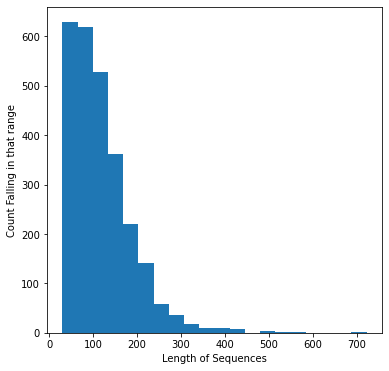

In [17]:
import matplotlib.pyplot as plt
#fig,ax = plt.figure(figsize=(6,6))
plt.figure(figsize=(6,6))
plt.hist(length , bins=20)
plt.xlabel('Length of Sequences')
plt.ylabel('Count Falling in that range')
plt.show()

In [19]:
def save_doc(lines , filename):
  # Saving each line on a new line
  data = '\n'.join(lines)
  file = open(filename , 'w')
  file.write(data)
  file.close()
  print("Done")

In [20]:
file_name = 'clean_war.txt'
save_doc(sequences_2 , file_name)

Done


In [21]:
def load_data(filename):
  file = open(filename)
  text = file.read()
  file.close()
  return text

In [22]:
file_name = 'clean_war.txt'
doc = load_data(file_name)
lines = doc.split('\n')


In [23]:
lines[0]

'  no one would have believed in the last years of the nineteenth century that this world was being watched keenly and closely by intelligences greater than mans and yet as mortal as his own that as men busied themselves about their various concerns they were scrutinised and studied perhaps almost as narrowly as a man with a microscope might scrutinise the transient creatures that swarm and multiply in a drop of water'

In [68]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,Dropout
from keras.preprocessing.sequence import pad_sequences
import random

In [25]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

In [26]:
vocab_size = len(tokenizer.word_index)+1
print(vocab_size)

6936


In [29]:
# Padding sequences
max_len = 100 + 1
sequences = pad_sequences(sequences , maxlen = max_len , padding= 'pre' , truncating='pre')

In [30]:
sequences = np.array(sequences)
X,y = sequences[:,:-1] , sequences[:,-1]
y = to_categorical(y , num_classes=vocab_size)
seq_length = X.shape[1]

In [33]:
print(seq_length)

100


In [50]:
# downloading  pretrained GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-09-27 13:46:56--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-09-27 13:46:56--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-09-27 13:46:57--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [51]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [52]:
import os
import numpy as np

In [53]:
glove_dir = './'

embeddings_index = {} #initialize dictionary
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [57]:
embedding_dim = 100

embedding_matrix = np.zeros((vocab_size, embedding_dim)) #create an array of zeros with word_num rows and embedding_dim columns
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < vocab_size:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [89]:
# Build the modeling with Glove  Embedding Layer 
model_3 = Sequential()
model_3.add(Embedding(vocab_size,embedding_dim , input_length = seq_length))
model_3.add(LSTM(150 , return_sequences= True))
model_3.add(Dropout(0.3))
model_3.add(LSTM(100))
model_3.add(Dense(100 , activation='relu'))
model_3.add(Dense(vocab_size , activation= 'softmax'))
print(model_3.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 100)          693600    
_________________________________________________________________
lstm_19 (LSTM)               (None, 100, 150)          150600    
_________________________________________________________________
dropout_7 (Dropout)          (None, 100, 150)          0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 100)               100400    
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 6936)              700536    
Total params: 1,655,236
Trainable params: 1,655,236
Non-trainable params: 0
___________________________________________

In [90]:
model_3.layers[0].set_weights([embedding_matrix])
model_3.layers[0].trainable = False

In [91]:
model_3.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
model_3.fit(X ,y , batch_size = 64 , epochs=100)  

Epoch 1/100
42/42 [==============================] - 2s 58ms/step - loss: 8.4343 - accuracy: 0.0053
Epoch 2/100
42/42 [==============================] - 2s 52ms/step - loss: 7.1577 - accuracy: 0.0189
Epoch 3/100
42/42 [==============================] - 2s 46ms/step - loss: 6.9754 - accuracy: 0.0189
Epoch 4/100
42/42 [==============================] - 2s 46ms/step - loss: 6.9296 - accuracy: 0.0189
Epoch 5/100
42/42 [==============================] - 2s 46ms/step - loss: 6.9102 - accuracy: 0.0189
Epoch 6/100
42/42 [==============================] - 2s 46ms/step - loss: 6.8999 - accuracy: 0.0189
Epoch 7/100
42/42 [==============================] - 2s 46ms/step - loss: 6.8879 - accuracy: 0.0189
Epoch 8/100
42/42 [==============================] - 2s 46ms/step - loss: 6.8713 - accuracy: 0.0155
Epoch 9/100
42/42 [==============================] - 2s 46ms/step - loss: 6.8505 - accuracy: 0.0189
Epoch 10/100
42/42 [==============================] - 2s 46ms/step - loss: 6.8288 - accuracy: 0.0189

# The accuracy is  high , I think so model is overfitting!!




In [99]:
def generate_seq_3(model , tokenizer , seq_length , seed_text , n_words):
  result = list()
  for _ in range(n_words):
    #s
    encoded = tokenizer.texts_to_sequences([seed_text])[0]
    encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre' , padding = 'pre')
    y_pred = model_3.predict_classes(encoded , verbose=0)
    out_word = ''
    for word ,index in tokenizer.word_index.items():
      if index == y_pred:
        out_word = word
        break
    seed_text += ' '+out_word
    result.append(out_word)
  return ' '.join(result) 

In [98]:
seed_text = tokens[random.randint(0,len(tokens))]
#seed_text = 'There was once upon a time , when Britishers ruled India'
print(seed_text + '\n')

 there was a man with his wife and two boys and some articles of furniture in a cart such as greengrocers use



In [100]:
generated_text = generate_seq_3(model , tokenizer , seq_length , seed_text , 50)
print(seed_text + ' -> ' +  generated_text)

 there was a man with his wife and two boys and some articles of furniture in a cart such as greengrocers use -> hearts mine settled it mouth again killed horses gave them emptied restored miles us ruin another oclock beneath star it lay together immune conviction more days days days ago dead days be all out on me garden house house clearly forth over me garden house windows wanted on them hours


# Build the model Without Glove Embedding Layer


In [34]:
model = Sequential()
model.add(Embedding(vocab_size,50 , input_length=seq_length))
model.add(LSTM(150 , return_sequences= True))
model.add(LSTM(150))
model.add(Dense(100 , activation='relu'))
model.add(Dense(vocab_size , activation= 'softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           346800    
_________________________________________________________________
lstm (LSTM)                  (None, 100, 150)          120600    
_________________________________________________________________
lstm_1 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense (Dense)                (None, 100)               15100     
_________________________________________________________________
dense_1 (Dense)              (None, 6936)              700536    
Total params: 1,363,636
Trainable params: 1,363,636
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
model.compile(loss='categorical_crossentropy' , optimizer = 'adam')
model.fit(X ,y , batch_size = 64 , epochs=100)  

Epoch 1/100
42/42 [==============================] - 3s 67ms/step - loss: 8.4039
Epoch 2/100
42/42 [==============================] - 3s 62ms/step - loss: 7.2200
Epoch 3/100
42/42 [==============================] - 3s 62ms/step - loss: 7.0072
Epoch 4/100
42/42 [==============================] - 3s 61ms/step - loss: 6.9409
Epoch 5/100
42/42 [==============================] - 3s 60ms/step - loss: 6.9144
Epoch 6/100
42/42 [==============================] - 3s 60ms/step - loss: 6.9010
Epoch 7/100
42/42 [==============================] - 2s 59ms/step - loss: 6.8988
Epoch 8/100
42/42 [==============================] - 2s 59ms/step - loss: 6.8857
Epoch 9/100
42/42 [==============================] - 2s 58ms/step - loss: 6.8766
Epoch 10/100
42/42 [==============================] - 2s 58ms/step - loss: 6.8277
Epoch 11/100
42/42 [==============================] - 2s 58ms/step - loss: 6.7623
Epoch 12/100
42/42 [==============================] - 2s 58ms/step - loss: 6.7041
Epoch 13/100
42/42 [=====

In [45]:
def generate_seq(model , tokenizer , seq_length , seed_text , n_words):
  result = list()
  for _ in range(n_words):
    #s
    encoded = tokenizer.texts_to_sequences([seed_text])[0]
    encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre' , padding = 'pre')
    y_pred = model.predict_classes(encoded , verbose=0)
    out_word = ''
    for word ,index in tokenizer.word_index.items():
      if index == y_pred:
        out_word = word
        break
    seed_text += ' '+out_word
    result.append(out_word)
  return ' '.join(result) 

In [96]:
seed_text = tokens[random.randint(0,len(tokens))]
#seed_text = 'There was once upon a time , when Britishers ruled India'
print(seed_text + '\n')


 already men weeping with joy as i have heard shouting and staying their work to shake hands and shout were making up trains even as near as crewe to descend upon london



In [97]:
generated_text = generate_seq(model , tokenizer , seq_length , seed_text , 50)
print(seed_text + ' ' +  generated_text)

 already men weeping with joy as i have heard shouting and staying their work to shake hands and shout were making up trains even as near as crewe to descend upon london common creeper day rose forethought nearer bear another position packages brightly days days energy tone punch solitude shivering monstrous guns worry carriages quality empty shivering scalded scalded scalded scalded dead days it fro ago there itself dead doors upward yet killed desolate apathy days days days days two days days
